<a href="https://colab.research.google.com/github/nichakornchaisuwan/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [7]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [8]:
gen_exams('623020521-8') #รหัสนักศึกษา

รหัสนักศึกษา 623020521-8 ทำข้อ 2 และ 3


### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. ช่วงเช้าหรือช่วงบ่ายมีเครื่องบินขาเข้ามากกว่ากัน

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


###นำข้อมูลเข้า ข้อมูลเที่ยวบิน

In [5]:
flights = pd.read_csv('/content/drive/MyDrive/DWDM21_DATA/flights.csv')
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


#### ตรวจสอบค่า missing

In [41]:
flights.isnull().any()

วันในเดือน            False
วันในสัปดาห์          False
สายการบิน             False
รหัสสนามบินต้นทาง     False
รหัสสนามบินปลายทาง    False
ความล่าช้าขาออก       False
ความล่าช้าขาเข้า      False
dtype: bool

แสดงผลเป็น False ทั้งหมด หมายความว่า ไม่มีค่า Missing ในข้อมูลเที่ยวบิน



### นำเข้าข้อมูลสนามบิน

In [6]:
airports = pd.read_csv('/content/drive/MyDrive/DWDM21_DATA/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


####ตรวจสอบค่า Missing

In [10]:
airports.isnull().any()

รหัสสนามบิน    False
เมือง          False
รัฐ            False
ชื่อสนามบิน    False
dtype: bool

แสดงผลเป็น False ทั้งหมด หมายความว่า ไม่มีค่า Missing ในข้อมูลสนามบิน

###รวมทั้งสองตารางเข้าด้วยกัน

In [42]:
merged_table =flights.merge(airports,how='left',left_on='รหัสสนามบินต้นทาง',right_on='รหัสสนามบิน')
merged_table # รวมทั้งสองตารางเข้าด้วยกัน โดยใช้ รหัสสนามบินต้นทาง และรหัสสนามบิน เป็นตัวเชื่อม

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,11433,Detroit,MI,Detroit Metro Wayne County
1,19,5,DL,14869,12478,0,-8,14869,Salt Lake City,UT,Salt Lake City International
2,19,5,DL,14057,14869,-4,-15,14057,Portland,OR,Portland International
3,19,5,DL,15016,11433,28,24,15016,St. Louis,MO,Lambert-St. Louis International
4,19,5,DL,11193,12892,-6,-11,11193,Cincinnati,OH,Cincinnati/Northern Kentucky International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,13204,Orlando,FL,Orlando International
2702214,19,6,DL,10397,13495,-2,-3,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702215,19,6,DL,10140,10397,18,9,10140,Albuquerque,NM,Albuquerque International Sunport
2702216,19,6,DL,10397,13244,10,7,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International


####เปลี่ยนชื่อคอลัมน์

In [108]:
merged_table.rename(columns={'เมือง':'เมืองต้นทาง'},inplace=True)
merged_table.rename(columns={'รัฐ':'รัฐต้นทาง'},inplace=True)
merged_table.rename(columns={'ชื่อสนามบิน':'ชื่อสนามบินต้นทางต้นทาง'},inplace=True)

In [109]:
merged_table

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมืองต้นทาง,รัฐต้นทาง,ชื่อสนามบินต้นทางต้นทาง
0,19,5,DL,11433,13303,-3,1,11433,Detroit,MI,Detroit Metro Wayne County
1,19,5,DL,14869,12478,0,-8,14869,Salt Lake City,UT,Salt Lake City International
2,19,5,DL,14057,14869,-4,-15,14057,Portland,OR,Portland International
3,19,5,DL,15016,11433,28,24,15016,St. Louis,MO,Lambert-St. Louis International
4,19,5,DL,11193,12892,-6,-11,11193,Cincinnati,OH,Cincinnati/Northern Kentucky International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,13204,Orlando,FL,Orlando International
2702214,19,6,DL,10397,13495,-2,-3,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702215,19,6,DL,10140,10397,18,9,10140,Albuquerque,NM,Albuquerque International Sunport
2702216,19,6,DL,10397,13244,10,7,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International


###ข้อ 2 วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์

In [43]:
import numpy as np      # import เพื่อใช้งาน pyplot
from matplotlib import pyplot as plt

In [44]:
day_week = merged_table.groupby('วันในสัปดาห์')[['รหัสสนามบินต้นทาง']].count()
day_week # จัดกลุ่มวันในสัปดาห์ โดยนับจำนวนเครื่องบินขาออกจาก คอลัมน์รหัสสนามบิน

,รหัสสนามบินต้นทาง
วันในสัปดาห์,
1,407837
2,397594
3,403072
4,406563
5,396387
6,318537
7,372228


In [45]:
np.arange(len(day_week.iloc[:,0])) 

array([0, 1, 2, 3, 4, 5, 6])

IndexError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3626 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s

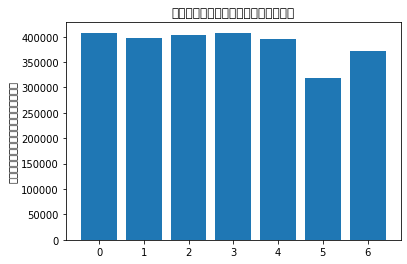

In [46]:
plt.bar(np.arange(len(day_week.iloc[:,0])), day_week.iloc[:,0])

plt.ylabel('รหัสสนามบินต้นทาง')
plt.title('รหัสสนามบินต้นทาง')
plt.xticks(np.arange(len(day_week.iloc[:,1]))+0.3, day_week.iloc[:,1])
plt.legend(); # plot กราฟ histogram จากจำนวนวันในสัปดาห์ และจำนวนเครื่องบินขาออก

### ข้อ 3 สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด



In [82]:
airline = merged_table.groupby('สายการบิน')[['รหัสสนามบินต้นทาง']].count()
airline # จัดกลุ่มสายการบิน โดยนับจำนวนเที่ยวบินจาก คอลัมน์ รหัสสนามบินต้นทาง

,รหัสสนามบินต้นทาง
สายการบิน,
9E,80031
AA,289855
AS,68555
B6,121906
DL,381657
EV,157928
F9,35738
FL,92702
HA,17432


In [88]:
airline_sort = airline.sort_values(by=['รหัสสนามบินต้นทาง']) # เรียงจากน้อยไปมาก
airline_sort 

,รหัสสนามบินต้นทาง
สายการบิน,
HA,17432
VX,34739
F9,35738
YV,52821
AS,68555
9E,80031
FL,92702
MQ,113212
B6,121906


In [97]:
airline_Max =airline_sort.iloc[-1:,:1]  #สายการบินที่มีเที่ยวบินมากที่สุด
airline_Max

,รหัสสนามบินต้นทาง
สายการบิน,
WN,575739


In [98]:
airline_Min =airline_sort.iloc[:1]  #สายการบินที่มีเที่ยวบินน้อยที่สุด
airline_Min

,รหัสสนามบินต้นทาง
สายการบิน,
HA,17432


###ข้อที่ให้นักศึกษาคิดเอง 
วันที่เท่าไหร่ที่มีจำนวนเที่ยวบินมากที่สุด

In [99]:
day_month = merged_table.groupby('วันในเดือน')[['รหัสสนามบินต้นทาง']].count()
day_month # จัดกลุ่มจำนวนวันที่ในเดือน โดยนับจำนวนเที่ยวบินจาก คอลัมน์รหัสสนามบินต้นทาง

,รหัสสนามบินต้นทาง
วันในเดือน,
1,84636
2,89760
3,90172
4,84758
5,86426
6,87702
7,88011
8,89019
9,91412


In [103]:
day_monthsort = day_month.sort_values(by=['รหัสสนามบินต้นทาง'])
day_monthsort # เรียงจำนวนเที่ยวบินจากน้อยไปมาก

,รหัสสนามบินต้นทาง
วันในเดือน,
31,47977
1,84636
4,84758
27,85814
26,86364
5,86426
20,86780
13,87113
28,87450


In [107]:
daymonth_Max = day_monthsort.iloc[-1:,:1]  # วันที่มีจำนวนเที่ยวบินที่มากที่สุดคือ วันที่ 16 ที่มีจำนวนเที่ยวบินอยู่ที่ 91483 เที่ยวบิน
daymonth_Max

,รหัสสนามบินต้นทาง
วันในเดือน,
16,91483
